**Step 1: Data Loading and Preprocessing**

*1. We will first Load Data*

In [16]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Load the dataset
file_path = 'IBM_2006-01-01_to_2018-01-01.csv'  # Adjust path if necessary
ibm_data = pd.read_csv(file_path)

# Select relevant columns
ibm_data = ibm_data[['Open', 'High', 'Low', 'Close']]


*2: Now we will Normalize Data*

In [17]:
# Initialize Min-Max Scaler
scaler = MinMaxScaler()

# Fit and transform the data
ibm_scaled = scaler.fit_transform(ibm_data)

# Convert to DataFrame for easier handling
ibm_scaled = pd.DataFrame(ibm_scaled, columns=ibm_data.columns)


**Step 2: Performing hyperparameter optimization for  LSTM**

In [15]:
!pip install -q -U keras-tuner
import keras_tuner as kt
from tensorflow import keras

def build_lstm_model(hp):
    model = Sequential()
    model.add(LSTM(
        units=hp.Int('units', min_value=32, max_value=512, step=32),
        return_sequences=True,
        input_shape=(X_train.shape[1], X_train.shape[2])
    ))
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=50, step=32)))
    model.add(Dense(4))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')
        ),
        loss='mean_squared_error'
    )
    return model

# Instantiate the tuner
tuner = kt.Hyperband(
    build_lstm_model,
    objective='val_loss',
    max_epochs=50,
    hyperband_iterations=2,
    directory='my_dir',
    project_name='keras_lstm'
)

# Perform hyperparameter tuning
tuner.search(X_train, y_train, epochs=10, validation_split=0.1, verbose=1)

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]



Reloading Tuner from my_dir/keras_lstm/tuner0.json

Search: Running Trial #87

Value             |Best Value So Far |Hyperparameter
512               |160               |units
0.0071098         |0.0064927         |learning_rate
50                |50                |tuner/epochs
0                 |17                |tuner/initial_epoch
0                 |3                 |tuner/bracket
0                 |3                 |tuner/round

Epoch 1/50
68/68 [==============================] - 33s 396ms/step - loss: 0.2310 - val_loss: 0.0357
Epoch 2/50
68/68 [==============================] - 25s 371ms/step - loss: 0.1033 - val_loss: 0.1176
Epoch 3/50
68/68 [==============================] - 37s 539ms/step - loss: 0.0953 - val_loss: 0.0061
Epoch 4/50
68/68 [==============================] - 25s 371ms/step - loss: 0.1217 - val_loss: 0.0945
Epoch 5/50
68/68 [==============================] - 25s 373ms/step - loss: 0.1059 - val_loss: 0.0059
Epoch 6/50
68/68 [==============================] - 26s

KeyboardInterrupt: ignored

**Step 2: Building LSTM and RNN Models**

*1. Preparing Time Series Data for LSTM/RNN Model*

In [18]:
import numpy as np

def create_sequences(data, seq_length):
    xs = []
    ys = []

    for i in range(len(data)-seq_length-1):
        x = data[i:(i+seq_length)]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)

    return np.array(xs), np.array(ys)

# Define sequence length
seq_length = 10  # This is a hyperparameter

# Create sequences
X, y = create_sequences(ibm_scaled.values, seq_length)


2. Now we are building the LSTM Model

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define LSTM model
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])),
    LSTM(50),
    Dense(4)  # Predicting 4 values (Open, High, Low, Close)
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')


*3. Now we are building the RNN Model*

In [21]:
from tensorflow.keras.layers import SimpleRNN

# Define RNN model
rnn_model = Sequential([
    SimpleRNN(50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])),
    SimpleRNN(50),
    Dense(4)  # Predicting 4 values (Open, High, Low, Close)
])

# Compile the model
rnn_model.compile(optimizer='adam', loss='mean_squared_error')


**Step 3: Training LSTM and RNN Models**

*1. Splitting Data into Training and Testing Sets*

As described in our model strategy

In [22]:
# Define a split for training and testing
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size

# Split the data
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


*2. Now time for the Training LSTM Model*

In [23]:
# Train the LSTM model
history_lstm = lstm_model.fit(
    X_train, y_train,
    epochs=50,  # Number of epochs is a hyperparameter that can be tuned
    batch_size=32,
    validation_split=0.1,
    verbose=1
)


Epoch 1/50
68/68 [==============================] - 6s 28ms/step - loss: 0.0299 - val_loss: 9.2199e-04
Epoch 2/50
68/68 [==============================] - 1s 14ms/step - loss: 6.8950e-04 - val_loss: 8.3786e-04
Epoch 3/50
68/68 [==============================] - 1s 14ms/step - loss: 6.6837e-04 - val_loss: 9.3799e-04
Epoch 4/50
68/68 [==============================] - 1s 14ms/step - loss: 6.4264e-04 - val_loss: 8.3328e-04
Epoch 5/50
68/68 [==============================] - 1s 21ms/step - loss: 6.5139e-04 - val_loss: 8.6300e-04
Epoch 6/50
68/68 [==============================] - 1s 17ms/step - loss: 6.2672e-04 - val_loss: 7.7649e-04
Epoch 7/50
68/68 [==============================] - 2s 23ms/step - loss: 6.2150e-04 - val_loss: 9.4695e-04
Epoch 8/50
68/68 [==============================] - 2s 22ms/step - loss: 6.4922e-04 - val_loss: 9.6948e-04
Epoch 9/50
68/68 [==============================] - 1s 21ms/step - loss: 5.9946e-04 - val_loss: 7.7689e-04
Epoch 10/50
68/68 [======================

*3. Now we will start the Training RNN Model*

In [24]:
# Train the RNN model
history_rnn = rnn_model.fit(
    X_train, y_train,
    epochs=50,  # Number of epochs can be adjusted
    batch_size=32,
    validation_split=0.1,
    verbose=1
)


Epoch 1/50
68/68 [==============================] - 3s 12ms/step - loss: 0.0325 - val_loss: 8.6053e-04
Epoch 2/50
68/68 [==============================] - 1s 9ms/step - loss: 9.1819e-04 - val_loss: 0.0010
Epoch 3/50
68/68 [==============================] - 1s 9ms/step - loss: 7.2935e-04 - val_loss: 4.5931e-04
Epoch 4/50
68/68 [==============================] - 1s 9ms/step - loss: 6.5515e-04 - val_loss: 5.2764e-04
Epoch 5/50
68/68 [==============================] - 1s 9ms/step - loss: 5.2612e-04 - val_loss: 5.4398e-04
Epoch 6/50
68/68 [==============================] - 1s 12ms/step - loss: 5.5134e-04 - val_loss: 4.3356e-04
Epoch 7/50
68/68 [==============================] - 1s 12ms/step - loss: 4.7577e-04 - val_loss: 5.4947e-04
Epoch 8/50
68/68 [==============================] - 1s 12ms/step - loss: 4.5929e-04 - val_loss: 6.6663e-04
Epoch 9/50
68/68 [==============================] - 1s 12ms/step - loss: 4.1053e-04 - val_loss: 4.2052e-04
Epoch 10/50
68/68 [==============================

**Step 4: Evaluating and Plotting Model Performance**

*1. Plotting Training and Validation Loss*

After the training of the model, now we will try to plot the results

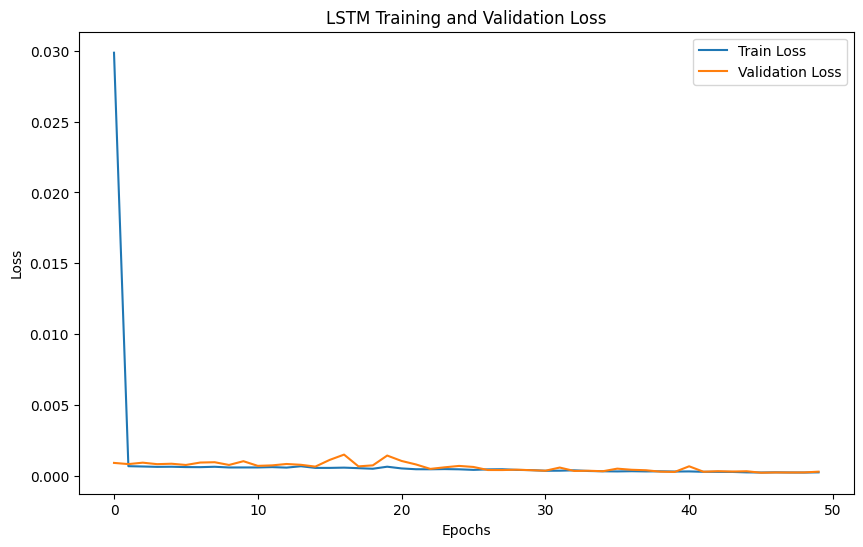

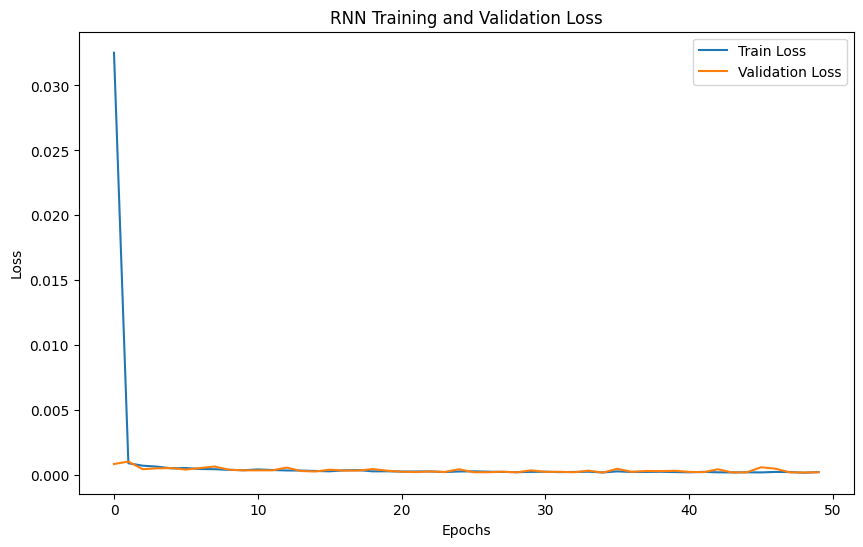

In [25]:
import matplotlib.pyplot as plt

# Function to plot history
def plot_history(history, title):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Plot for LSTM
plot_history(history_lstm, 'LSTM Training and Validation Loss')

# Plot for RNN
plot_history(history_rnn, 'RNN Training and Validation Loss')


**Step 5: Model Evaluation and Comparison**

*`1. Making Predictions`*

we will print NAN, shape to ensure that if there is some incomplete preprocessing, issues during model prediction, or mismatches in the data shapes before calculating RSME, MAE and MAPE

In [31]:
# Make predictions
lstm_predictions = lstm_model.predict(X_test)
rnn_predictions = rnn_model.predict(X_test)
print("NaN in LSTM Predictions:", np.isnan(lstm_predictions).any())
print("NaN in RNN Predictions:", np.isnan(rnn_predictions).any())
print("NaN in Test Labels:", np.isnan(y_test).any())

print("Shape of LSTM predictions:", lstm_predictions.shape)
print("Shape of RNN predictions:", rnn_predictions.shape)
print("Shape of y_test:", y_test.shape)



19/19 [==============================] - 0s 3ms/step
NaN in LSTM Predictions: True
NaN in RNN Predictions: True
NaN in Test Labels: True
Shape of LSTM predictions: (602, 4)
Shape of RNN predictions: (602, 4)
Shape of y_test: (602, 4)


*2. Calculating RMSE, MAE, and MAPE*

In [32]:
# Replace NaN values in predictions with the mean of non-NaN values
lstm_predictions = np.nan_to_num(lstm_predictions, nan=np.nanmean(lstm_predictions))
rnn_predictions = np.nan_to_num(rnn_predictions, nan=np.nanmean(rnn_predictions))

# Similarly, handle NaNs in y_test
y_test = np.nan_to_num(y_test, nan=np.nanmean(y_test))

# Now calculate the metrics
lstm_rmse, lstm_mae, lstm_mape = calculate_metrics(y_test, lstm_predictions)
rnn_rmse, rnn_mae, rnn_mape = calculate_metrics(y_test, rnn_predictions)


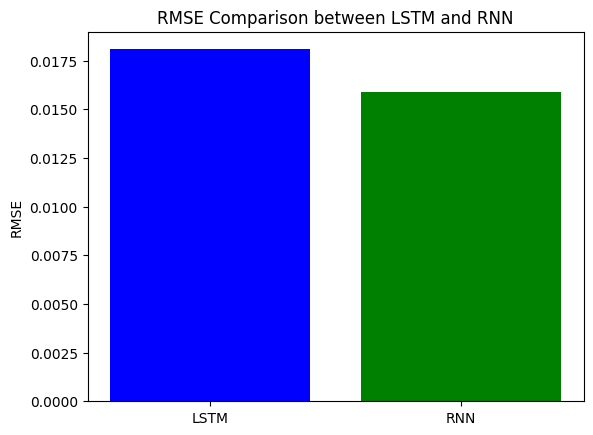

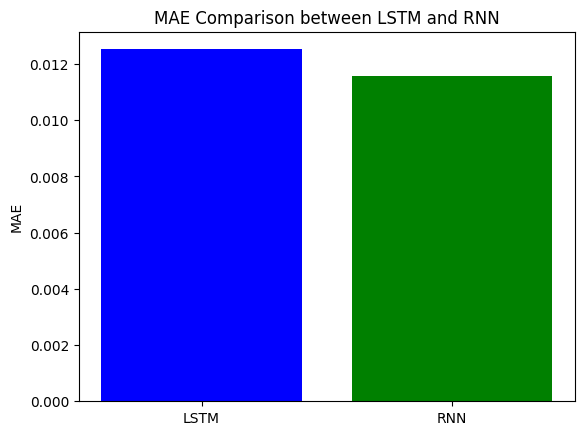

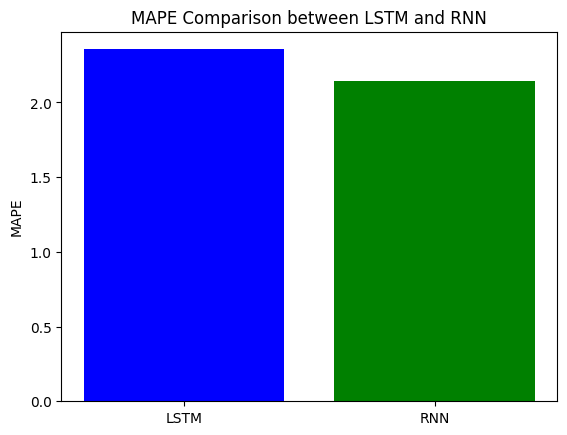

In [34]:
import matplotlib.pyplot as plt

# Function to plot comparison
def plot_comparison(metric_lstm, metric_rnn, metric_name):
    plt.bar(['LSTM', 'RNN'], [metric_lstm, metric_rnn], color=['blue', 'green'])
    plt.title(f'{metric_name} Comparison between LSTM and RNN')
    plt.ylabel(metric_name)
    plt.show()

# Plot RMSE Comparison
plot_comparison(lstm_rmse, rnn_rmse, 'RMSE')

# Plot MAE Comparison
plot_comparison(lstm_mae, rnn_mae, 'MAE')

# Plot MAPE Comparison
plot_comparison(lstm_mape, rnn_mape, 'MAPE')
